# Summary Analysis

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_respondents = pd.read_csv('main_respondents.csv')
df_respondents.head()

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,JobSeek,YearsCodePro,ConvertedComp,WorkWeekHrs
0,1,2019,United States,Employed full-time,CompSci,"Developer, full-stack",I am not interested in new job opportunities,1.0,60000.0,80.0
1,1,2020,United States,Employed full-time,CompSci,NaN,NaN,8.0,NaN,NaN
2,2,2018,United States,Employed full-time,CompSci,"Developer, full-stack",NaN,4.0,50000.0,NaN
3,2,2019,United States,Employed full-time,CompSci,Data or business analyst,I am not interested in new job opportunities,8.0,90000.0,40.0
4,2,2020,United States,Employed full-time,CompSci,"Developer, back-end","I’m not actively looking, but I am open to new...",13.0,120000.0,40.0


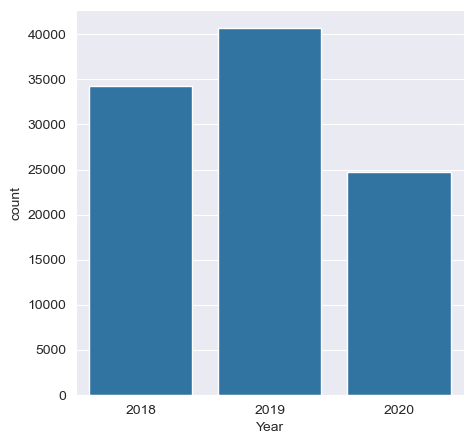

<Figure size 640x480 with 0 Axes>

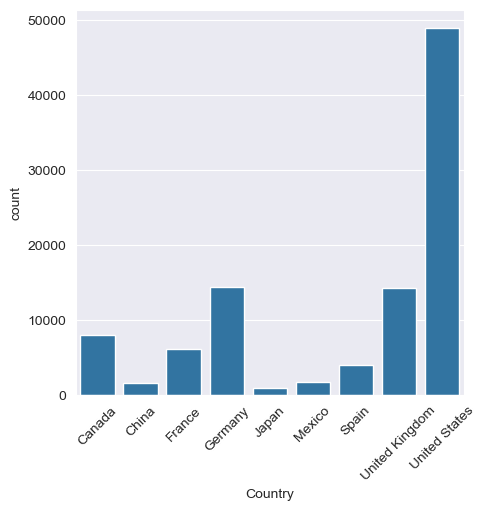

<Figure size 640x480 with 0 Axes>

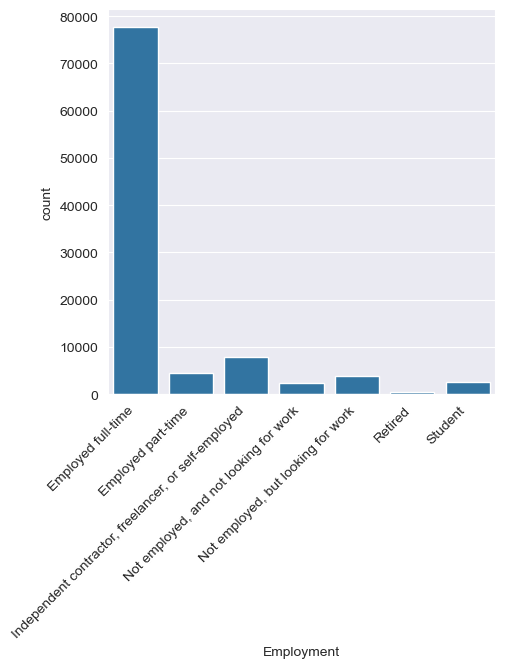

<Figure size 640x480 with 0 Axes>

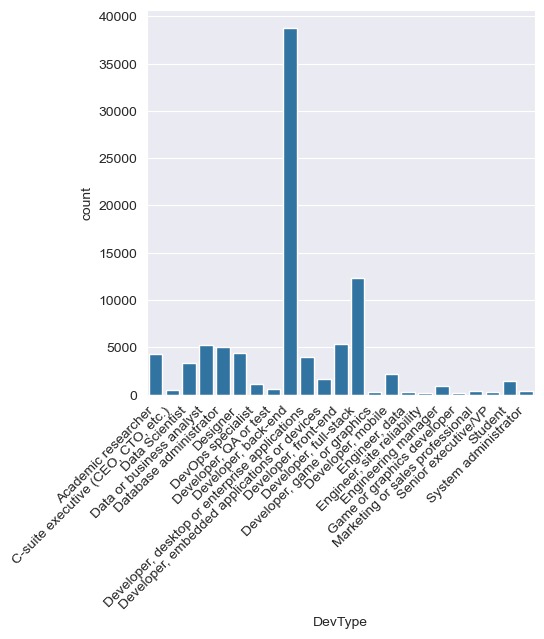

<Figure size 640x480 with 0 Axes>

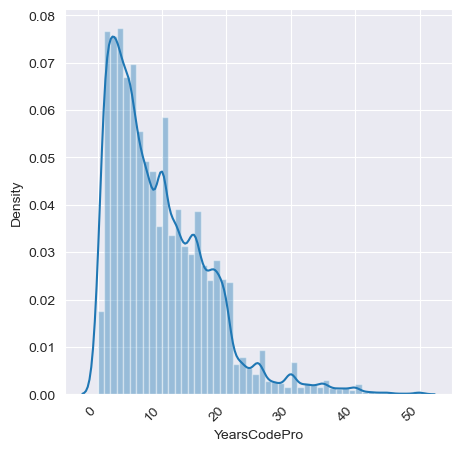

<Figure size 640x480 with 0 Axes>

<Figure size 500x500 with 0 Axes>

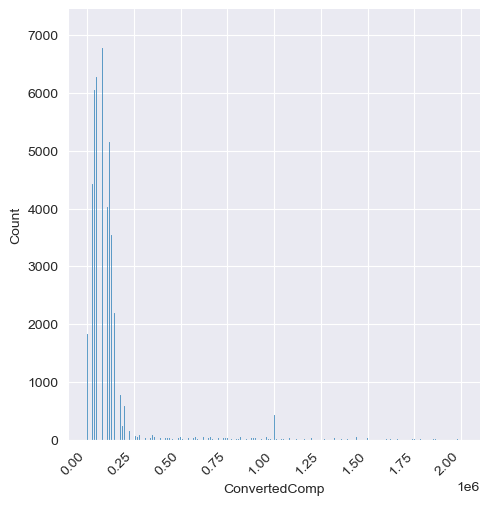

<Figure size 640x480 with 0 Axes>

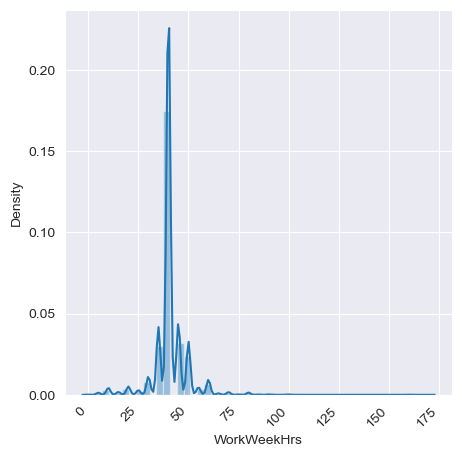

<Figure size 640x480 with 0 Axes>

In [3]:
# fig0, ax0 = plt.subplots(3,3, figsize=(9,9))
plt.figure(figsize=(5,5))
sns.countplot(data=df_respondents.sort_values(by='Year'), x='Year')
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
sns.countplot(data=df_respondents.sort_values(by='Country'), x='Country')
plt.xticks(rotation=45)
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
sns.countplot(data=df_respondents.sort_values(by='Employment'), x='Employment')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
sns.countplot(data=df_respondents.sort_values(by='DevType'), x='DevType')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
sns.distplot(df_respondents.YearsCodePro)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
sns.displot(data=df_respondents, x='ConvertedComp')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
sns.distplot(df_respondents.WorkWeekHrs)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

In [4]:
# Summarize Database plot
df_database = pd.read_csv('resp_databases.csv')
df_database.head()

,RespondentID,Year,DBWorkedWith_Amazon DynamoDB,DBWorkedWith_Amazon RDS/Aurora,DBWorkedWith_Amazon Redshift,DBWorkedWith_Apache HBase,DBWorkedWith_Apache Hive,DBWorkedWith_Cassandra,DBWorkedWith_Couchbase,DBWorkedWith_DynamoDB,...,DBDesire_Microsoft SQL Server,DBDesire_MongoDB,DBDesire_MySQL,DBDesire_Neo4j,DBDesire_Oracle,DBDesire_Other(s):,DBDesire_PostgreSQL,DBDesire_Redis,DBDesire_SQL Server,DBDesire_SQLite
0,1,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2020,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Group by Year
df_database_grouped = df_database.groupby('Year').agg('sum')
df_database_grouped_workedwith = df_database_grouped.iloc[:,:0]
df_database_grouped_workedwith = pd.concat([df_database_grouped_workedwith, df_database_grouped.filter(like='DBWorkedWith')], axis=1)

# Drop Prefix
df_database_grouped_workedwith.columns = df_database_grouped_workedwith.columns.str.replace('DBWorkedWith_', '')


# Add redundant inputs and drop 
df_database_grouped_workedwith['IBM DB2'] = df_database_grouped_workedwith['IBM DB2'] + df_database_grouped_workedwith['IBM Db2']
df_database_grouped_workedwith.drop('IBM Db2', axis=1, inplace=True)

# Transpose
df_database_grouped_workedwith = df_database_grouped_workedwith.T.sort_values(by=[2018, 2019, 2020], ascending=False)
df_database_grouped_workedwith['Total'] = df_database_grouped_workedwith.sum(axis=1)
df_database_grouped_workedwith

Year,2018,2019,2020,Total
MySQL,5607,6744,3882,16233
PostgreSQL,4394,5197,3181,12772
Microsoft SQL Server,2905,3563,2193,8661
MongoDB,2845,3271,1961,8077
SQLite,2810,3374,2106,8290
Redis,2410,3067,1775,7252
Elasticsearch,1893,2131,1394,5418
SQL Server,1755,1992,1278,5025
Oracle,1441,1696,1030,4167
MariaDB,1302,1595,916,3813


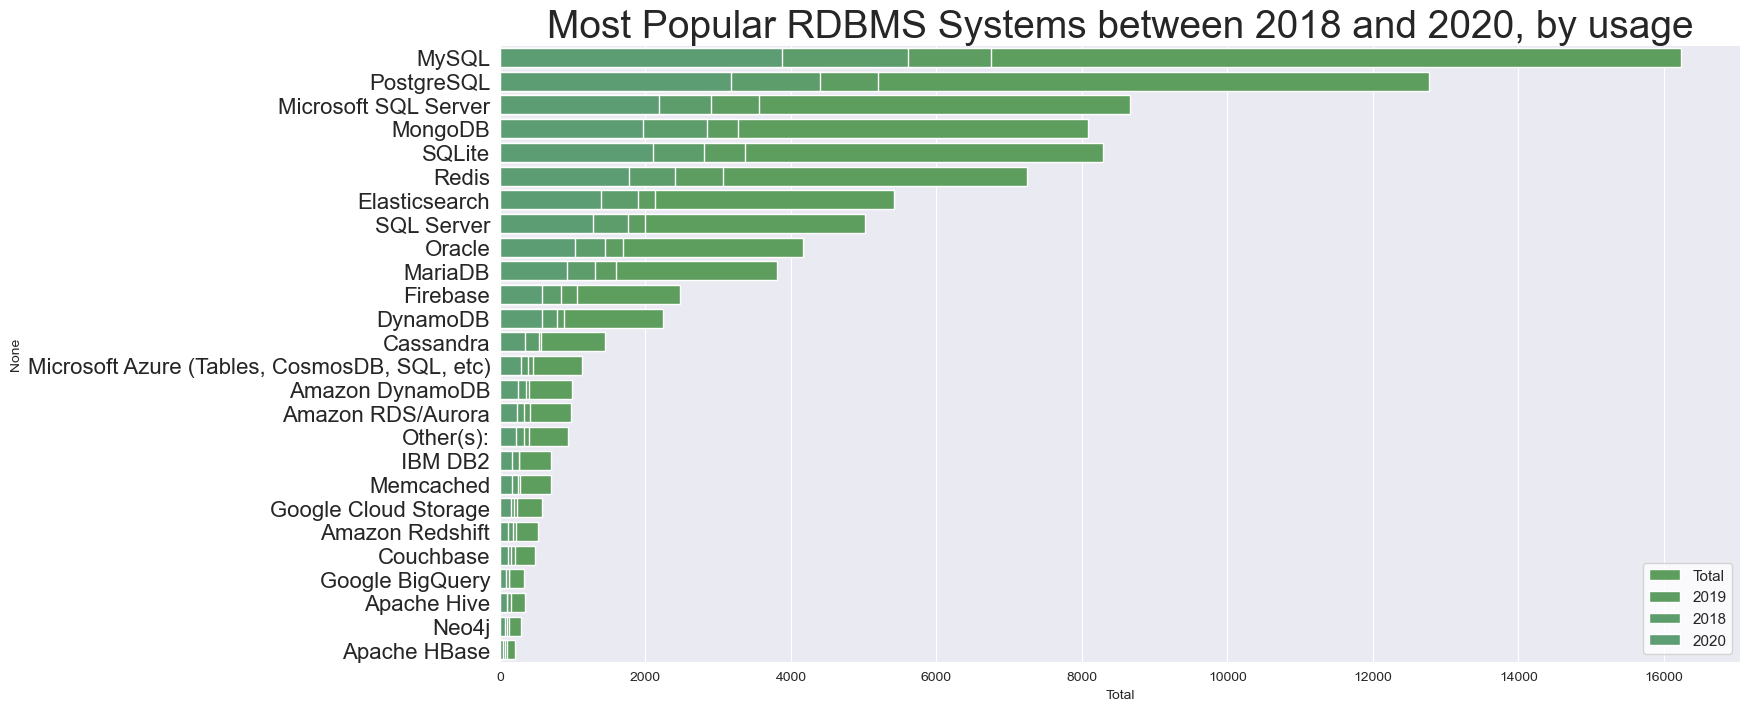

<Figure size 640x480 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set_theme(style="whitegrid")
sns.barplot(y=df_database_grouped_workedwith.index, x='Total', data=df_database_grouped_workedwith, color='#52A853', ax=ax, label='Total')
sns.barplot(y=df_database_grouped_workedwith.index, x=2019, data=df_database_grouped_workedwith, color='#52A859', ax=ax, label='2019')
sns.barplot(y=df_database_grouped_workedwith.index, x=2018, data=df_database_grouped_workedwith, color='#52A865', ax=ax, label='2018')
sns.barplot(y=df_database_grouped_workedwith.index, x=2020, data=df_database_grouped_workedwith, color='#52A870', ax=ax, label='2020')
sns.despine(right=True, top=True)
ax.set_title('Most Popular RDBMS Systems between 2018 and 2020, by usage', fontsize=28)
ax.set_yticklabels(labels=df_database_grouped_workedwith.index, fontsize=16)
plt.legend()
plt.show()
plt.clf()